# Exercício - Perceptron

## Implementação do Perceptron

In [ ]:
import numpy as np

class myPerceptron:
    def __init__(self, X: np.ndarray, Y: np.ndarray, eta: float, tol: float, max_epochs: int, par=1):
        """
        Perceptron class.

        Parameters:
        X (ndarray): input data
        Y (ndarray): target labels
        eta (float): learning rate
        tol (float): error tolerance
        max_epochs (int): maximum number of epochs
        """
        if par == 1:
            # Add bias term to the input data
            w = np.random.randn(X.shape[1] + 1)
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        else:
            w = np.random.randn(X.shape[1])
        
        N = len(X)
        self.error_epoch = [tol + 1]
        self.n_epoch = [0]
        
        while self.n_epoch[-1] < max_epochs and self.error_epoch[-1] > tol:
            xseq = np.random.permutation(N)
            ei2 = 0

            for i in range(N):
                i_rand = xseq[i]
                err = Y[i_rand] - np.sign(np.dot(w, X[i_rand, :]))
                w += eta * err * X[i_rand, :]
                ei2 += err ** 2
            self.error_epoch.append(ei2[0])
            self.n_epoch.append(self.n_epoch[-1] + 1)
        
        self.w = w

    def predict(self, x: np.ndarray, w: np.ndarray, par=1):
        """
        Fit the model to the data.

        Parameters:
        X (ndarray): input data
        Y (ndarray): target labels
        """
        if par == 1:
            # Add bias term to the input data
            x = np.hstack((np.ones(x.shape), x))
        
        u = np.dot(x, w)
        y = 1 * (u >= 0) 
        return y.reshape(-1, 1)  

# Geração de duas classes gaussianas sintéticas

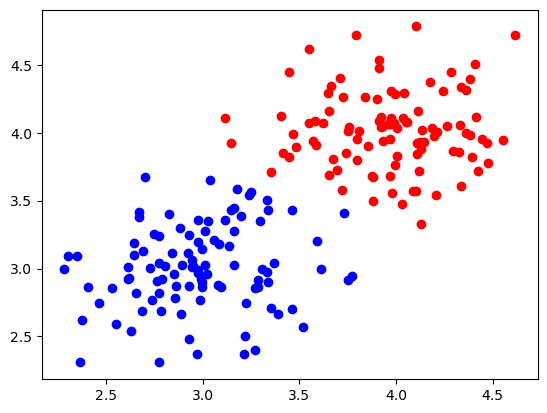

In [3]:
import matplotlib.pyplot as plt
from utils import gen_2D_gaussians

X, Y = gen_2D_gaussians()

plt.scatter(X[:100, 0], X[:100, 1], c='b')
plt.scatter(X[100:, 0], X[100:, 1], c='r')

In [15]:
import matplotlib.pyplot as plt
perceptron = myPerceptron(X, Y, eta=0.1, tol=0.01, max_epochs=300)
plt.plot(perceptron.n_epoch, perceptron.error_epoch)
sample = np.array([3, 3])
print(perceptron.predict(sample, perceptron.w))

TypeError: Cannot interpret '1' as a data type